In [1]:
import pandas as pd
import os
import re

In [2]:
from util.io import Layout
layout = Layout(data_dir = 'logs_old') # pilot data, so just me doing my task :)

In [3]:
layout.get_subjects()

['01', '04', '05', '06', '07', '08', '09']

In [4]:
df = layout.load('09', 'discrimination')
df.head()

,trial,onset,contrast,stimulus_position,response,correct,logC_5th_perc,logC_mean,logC_95th_perc
0,1,27.749813,0.524807,lower_right,left,False,-1.327443,-0.500000,0.317443
1,2,34.174754,1.000000,lower_left,left,True,-0.637256,-0.169733,0.449025
2,3,40.008126,0.912011,upper_right,right,True,-0.666870,-0.249409,0.375162
3,4,45.958237,0.724436,lower_right,right,True,-0.691157,-0.324050,0.287937
4,5,51.957479,0.588844,lower_right,left,False,-0.716482,-0.387423,0.202645


In [5]:
t = df.onset.iloc[-1]/60 
print('Discrimination/calibration block took %.02f minutes.'%t)

Discrimination/calibration block took 10.27 minutes.


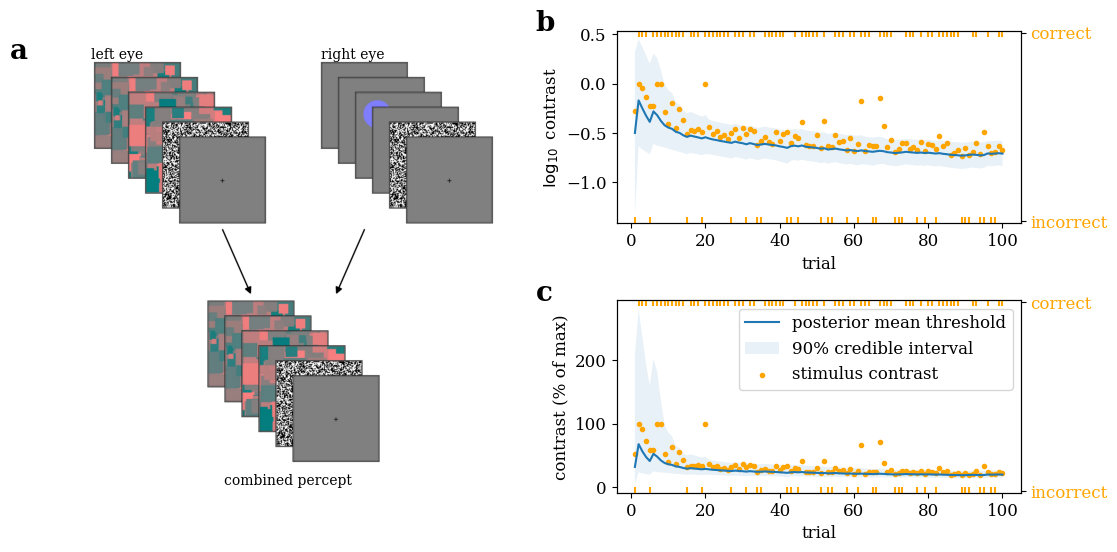

In [6]:
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 12})

def add_label(ax, label):
    xmin, xmax = ax.get_xlim()
    xscale = xmax - xmin
    ymin, ymax = ax.get_ylim()
    yscale = ymax - ymin
    ax.text(
        xmin - .2 * xscale, ymax, 
        label, size = 20, weight = 'bold'
    )

def plot_contrast(ax1, df, plot_scale):

    trial = df.trial
    if plot_scale == 'log10':
        mean = df.logC_mean
        upper = df.logC_95th_perc
        lower = df.logC_5th_perc
        contrast = np.log10(df.contrast)
    elif plot_scale == 'percent':
        mean = (10**df.logC_mean) * 100
        upper = (10**df.logC_95th_perc) * 100
        lower = (10**df.logC_5th_perc) * 100
        contrast = df.contrast * 100
        
    ax1.plot(trial, mean, label = 'posterior mean threshold')
    ax1.fill_between(df.trial, lower, upper, alpha = 0.1, label = '90% credible interval')
    ax1.scatter(trial, contrast, color = 'orange', label = 'stimulus contrast', marker = '.')
    ax1.set_xlabel('trial')
    if plot_scale == 'percent':
        ax1.set_ylabel('contrast (% of max)')
        #ax1.set_ylim(0, 100)
        ax1.legend(loc = 'upper right')
    elif plot_scale == 'log10':
        ax1.set_ylabel(r'$\log_{10}$ contrast')
    
    ax2 = ax1.twinx()
    ax2.set_ylim(-.01, 1.01)
    ax2.scatter(df.trial, df.correct, marker = '|', label = 'trial accuracy', color = 'orange')
    ax2.set_yticks([0, 1])
    ax2.set_yticklabels(['incorrect', 'correct'])
    ax2.tick_params(axis = 'y', labelcolor = 'orange')

fig = plt.figure(figsize = (12, 6))
gs = gridspec.GridSpec(2, 2, wspace = .3, hspace = .4)

# plot CFS illustration
left_ax = fig.add_subplot(gs[:, 0])
img = plt.imread('cfs.jpeg') # generated in experiment directory 
left_ax.imshow(img)
add_label(left_ax, 'a')
left_ax.axis('off')
# and add left/right labels
xmin, xmax = left_ax.get_xlim()
xscale = xmax - xmin
ymin, ymax = left_ax.get_ylim()
yscale = ymin - ymax
left_ax.text(
    0., ymax, 
    'left eye', size = 10
)
left_ax.text(
    .57*xscale, ymax, 
    'right eye', size = 10
)
left_ax.text(
    xmin + .33*xscale, ymin + .05*yscale, 
    'combined percept', size = 10
)


# plot on log scale
top_ax = fig.add_subplot(gs[0, 1])
plot_contrast(top_ax, df, 'log10')
add_label(top_ax, 'b')

# plot on linear scale
bottom_ax = fig.add_subplot(gs[1, 1])
plot_contrast(bottom_ax, df, 'percent')
add_label(bottom_ax, 'c')

if not os.path.exists('figures'):
    os.mkdir('figures')
f = os.path.join('figures', 'calibration-block.jpeg')
plt.savefig(f, dpi = 500, bbox_inches = 'tight')
plt.show()